# Micro Credit Defaulter Project

## Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients. 

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

> Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

> Points to Remember:

- There are no null values in the dataset. 
- There may be some customers with no loan history. 
- The dataset is imbalanced. Label ‘1’ has approximately 87.5 percent records, while, label ‘0’ has approximately 12.5 percent records.
- For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
- You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8 percent of the total data.  

In [ ]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import pandas_profiling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
df=pd.read_csv("Data_File.csv")

In [ ]:
df

We're looking at the first five and last five rows of our dataset. It reveals that our dataframe contains a total of 209593 rows and 37 columns. This is a Classification challenge since we have the label column that holds the defaulter and non deafulter values marked with 0 and 1.

### Exploratory Data Analysis (EDA)

In [ ]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

The "Unnamed: 0" column was removed from the dataset since it only stored index data starting at 1 instead of 0 and was not a useful feature column.

The remaining columns are as follows:
- label				: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure}
- msisdn			: Mobile number of user
- aon				: Age on cellular network in days
- daily_decr30		: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90		: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30			: Average main account balance over last 30 days
- rental90			: Average main account balance over last 90 days
- last_rech_date_ma	: Number of days till last recharge of main account
- last_rech_date_da	: Number of days till last recharge of data account
- last_rech_amt_ma	: Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30		: Number of times main account got recharged in last 30 days
- fr_ma_rech30		: Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30	: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30		: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30		: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90		: Number of times main account got recharged in last 90 days
- fr_ma_rech90		: Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90	: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90		: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90		: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30		: Number of times data account got recharged in last 30 days
- fr_da_rech30		: Frequency of data account recharged in last 30 days
- cnt_da_rech90		: Number of times data account got recharged in last 90 days
- fr_da_rech90		: Frequency of data account recharged in last 90 days
- cnt_loans30		: Number of loans taken by user in last 30 days
- amnt_loans30		: Total amount of loans taken by user in last 30 days
- maxamnt_loans30	: Maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days
- cnt_loans90		: Number of loans taken by user in last 90 days
- amnt_loans90		: Total amount of loans taken by user in last 90 days
- maxamnt_loans90	: Maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days
- payback30			: Average payback time in days over last 30 days
- payback90			: Average payback time in days over last 90 days
- pcircle			: Telecom circle
- pdate				: Date

In [ ]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

Column Description:

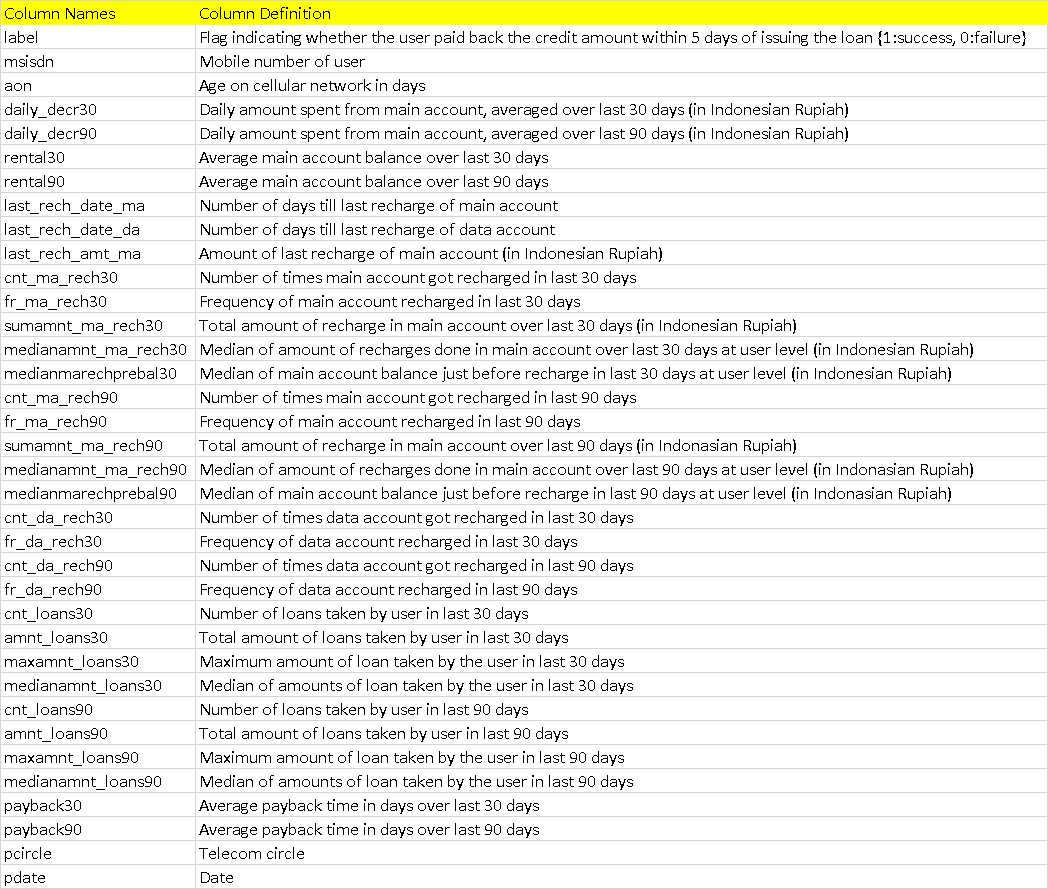

In [ ]:
df.isna().sum()

We won't have to worry about missing data because we don't have any missing values.

In [ ]:
missingno.bar(df, figsize = (25,5), color="tab:green")

In [ ]:
print("Number of Rows is {} and number of Columns is {} before dropping duplicates".format(df.shape[0], df.shape[1]))
df.drop_duplicates(inplace=True)
print("Number of Rows is {} and number of Columns is {} after dropping duplicates".format(df.shape[0], df.shape[1]))

In [ ]:
df.info()

We can validate the non null count details as well as the datatype information using the 'info' method. We have 21 columns with float/decimal datatypes, 12 columns with integer datatypes, and three columns with object/categorical datatypes. Before we can use the information in our machine learning models, we'll need to transform the object datatype columns to numerical data.

In [ ]:
df.describe().T

To examine the numerical data specifics, we utilised the 'describe' technique. There are 33 numerical values in the columns, and it appears that the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile, and maximum value are all mostly properly distributed in terms of data points, but I do see some abnormality that we will confirm with a visual.

In [ ]:
# visualizing the statistical description of numeric datatype columns
plt.figure(figsize = (20,15))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth = 2, annot= True, fmt = ".4f", cmap="plasma")
plt.title("Satistical Report of Numerical Columns")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

The highest value for columns aon, daily decr30, daily decr90, rental30, rental90, last rech date ma, last rech date da, fr ma rech30, sumamnt ma rech30, medianmarechprebal30, sumamnt ma rech90, and fr da rech30 is much higher than the other column values in the aforementioned report.

In [ ]:
df.nunique().sort_values().to_frame("Unique Values")

Column pcircle has a single data value filled in all of the items in the above list, and hence does not contribute much to the output label creation.

In [ ]:
df.drop("pcircle", axis=1, inplace=True)

The column "pcircle" has been eliminated because it does not contribute to label prediction.

In [ ]:
df.corr()

### Visualization

In [ ]:
pandas_profiling.ProfileReport(df)

'pandas-profiling' is an open source Python module that allows us to perform exploratory data analysis in a matter of minutes with just a few lines of code. It creates interactive online reports that may be delivered to anybody, even if they have no programming experience. It also provides report production for the dataset, with a variety of features and customizations. In other words, 'pandas-profiling' saves us the time and effort of visualising and comprehending each variable's distribution. It creates a report with all of the data in one place.

#### Univariate Analysis

In [ ]:
try:
    x = 'label'
    k=0
    plt.figure(figsize=[5,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Our label data is unbalanced, as shown in the above count plot, and will need to be balanced before we feed information into our classification machine learning models.

In [ ]:
try:
    x = 'maxamnt_loans90'
    k=0
    plt.figure(figsize=[7,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In [ ]:
try:
    x = 'medianamnt_loans30'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

In [ ]:
try:
    x = 'medianamnt_loans90'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

We can see the categories included in the columns, as well as the percentage and number of rows covered by each unique value of that column in our dataset, in the above count plots.

#### Bivariate Analysis

In [ ]:
y = 'label'

x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_da'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The above bar plots demonstrate whether a user was successful or unsuccessful in returning the credit amount based on the provided feature columns.

In [ ]:
df.plot(kind="line", x="pdate", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[15,10])

df.plot(kind="line", x="msisdn", y=["last_rech_date_da", "last_rech_date_ma", "last_rech_amt_ma"], figsize=[15,10])

Line plots for date and mobile number data with daily and monthly recharge information, as well as the amount factor, are shown below.

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_loans30', y='medianamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='maxamnt_loans30', y='maxamnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_da_rech30', y='cnt_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_loans30', y='cnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='amnt_loans30', y='amnt_loans90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='cnt_ma_rech30', y='cnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_da_rech30', y='fr_da_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='fr_ma_rech30', y='fr_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianamnt_ma_rech30', y='medianamnt_ma_rech90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='daily_decr30', y='daily_decr90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='rental30', y='rental90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='payback30', y='payback90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='medianmarechprebal30', y='medianmarechprebal90', data=df, hue='label')

plt.figure(figsize=(15,5))
sns.scatterplot(x='sumamnt_ma_rech30', y='sumamnt_ma_rech90', data=df, hue='label')

We can see the data distribution and success failure points on those feature columns using the scatter plot, which also shows any outlier characteristics in the dataset.

#### Multivariate Analysis

In [ ]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,30))
plt.show()

##### Observation:

`for feature aon:`
- Data ranges from -48 to 999860 with Mean value of 8112.34.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature daily_descr30:`
- Data ranges from -93 to 265926 with Mean value of 5381.4.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature daily_descr90:`
- Data ranges from -93 to 320630 with Mean value of 6082.52.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature rental30:`
- Data ranges from -23737.14 to 198926 with Mean value of 2692.58.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature rental90:`
- Data ranges from -24720 to 200148 with Mean value of 3483.41.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature last_rech_date_ma:`
- Data ranges from -29 to 998650 with Mean value of 3755.85.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature last_rech_date_da:`
- Data ranges from -29 to 999178 with Mean value of 3712.2.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature last_rech_amt_ma:`
- Data ranges from 0 to 55000 with Mean value of 2064.45.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature cnt_ma_rech30:`
- Data ranges from 0 to 203 with Mean value of 3.98.
- Data is not distributed normally or in well curve.
- Data is spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature fr_ma_rech30:`
- Data ranges from 0 to 999606 with Mean value of 3737.36.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature sumamnt_ma_rech30:`
- Data ranges from 0 to 810096 with Mean value of 7704.5.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature medianamnt_ma_rech30:`
- Data ranges from 0 to 55000 with Mean value of 1812.82.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature medianmarechprebal30:`
- Data ranges from -200 to 999479 with Mean value of 3851.93.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature cnt_ma_rech90:`
- Data ranges from 0 to 336 with Mean value of 6.32.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature fr_ma_rech90:`
- Data ranges from 0 to 88 with Mean value of 7.72.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature sumamnt_ma_rech90:`
- Data ranges from 0 to 953036 with Mean value of 12396.22.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature medianamnt_ma_rech90:`
- Data ranges from 0 to 55000 with Mean value of 1864.6.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature medianmarechprebal90:`
- Data ranges from -200 to 41456 with Mean value of 92.03.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature cnt_da_rech30:`
- Data ranges from 0 to 99914 with Mean value of 262.58.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature fr_da_rech30:`
- Data ranges from 0 to 999809 with Mean value of 3749.49.
- Data is not distributed normally or in well curve.
- Data is highly spreaded and needs to be treated accordingly.
- Data is positively skewed and needs to be treated accordingly.

`for feature cnt_da_rech90:`
- Data ranges from 0 to 38 with Mean value of 0.04.
- Data is distributed normally but not in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature fr_da_rech90:`
- Data ranges from 0 to 64 with Mean value of 0.05.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature cnt_loans30:`
- Data ranges from 0 to 50 with Mean value of 2.76.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature amnt_loans30:`
- Data ranges from 0 to 306 with Mean value of 17.95.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature maxamnt_loans30:`
- Data ranges from 0 to 99864 with Mean value of 274.66.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature medianamnt_loans30:`
- Data ranges from 0 to 3 with Mean value of 0.05.
- Data is not distributed normally or in well curve and it is understandable as feature has only limited set of values.
- Data is positively skewed and needs to be treated accordingly.

`for feature cnt_loans90:`
- Data ranges from 0 to 4997.52 with Mean value of 18.52.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature amnt_loans90:`
- Data ranges from 0 to 438 with Mean value of 23.65.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature maxamnt_loans90:`
- Data ranges from 0 to 12 with Mean value of 6.7.
- Data is not distributed normally or in well curve and it understandable as user has two option for loans i.e., 5 and 10 for with 6 and 12 has to be paid.
- Data is positively skewed and needs to be treated accordingly.

`for feature medianamnt_loans90:`
- Data ranges from 0 to 3 with Mean value of 0.05.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature payback30:`
- Data ranges from 0 to 171.5 with Mean value of 3.4.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

`for feature payback90:`
- Data ranges from 0 to 171.5 with Mean value of 4.32.
- Data is not distributed normally or in well curve.
- Data is positively skewed and needs to be treated accordingly.

#### Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [ ]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

We can't see the correlation details in the above heatmap owing to the large number of columns, but we can see the colour coding details and get a signal that there is no multicollinearity worry between the column values.

#### Correlation Bar Plot comparing Gender column with the remaining columns

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['label'].sort_values(ascending=False).drop('label').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

The feature columns that are favourably associated with our label and the feature columns that are negatively connected with our label are clearly defined in the above Bar Plot.

## Data Preprocessing

In [ ]:
df['pdate'] = pd.to_datetime(df['pdate'])

df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Date']=df['pdate'].dt.day

print(df['Year'].value_counts())
print(df['Month'].value_counts())
print(df['Date'].value_counts())

In [ ]:
df.drop(columns=['msisdn', 'pdate', 'Year'], axis=1, inplace=True)
df.head()

### Outliers

In [ ]:
plt.figure(figsize=(14,30))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()

We can observe the outlier features in our numerical data columns with the use of a boxen plot. However, when I tried to remove the outliers using the Z score or IQR techniques, I lost close to 25% of the data, therefore I kept all of the data points as they were to avoid any NaN results.

### Skewness

In [ ]:
df.skew()

We can observe that there are columns in our dataset that are over the permitted range of +/-0.5 value using the 'skew' approach.

In [ ]:
plt.figure(figsize=(14,30))
for i in range(0, len(outl_df)):
    plt.subplot(7, 5, i+1)
    ax = sns.distplot(df[outl_df[i]], color='blue')
    plt.tight_layout()

We can observe the skewness information in our numerical data columns using the distribution plot. I tried using log transformation to lessen the skewness, but that resulted in NaN values in our dataset, therefore I'm attempting to prevent that by utilising somewhat skewed data.

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [ ]:
X = df.drop('label', axis=1)
Y = df['label']

The dataset has been divided into features and labels, with X denoting all feature columns and Y denoting the target label column.

### Resolving the class imbalance issue in our label column

In [ ]:
old_label = Y.value_counts()
old_label

Counting the number of rows occupied by each category by listing the values of our label column. This indicates a class imbalance that will require the use of the oversampling approach to correct.

In [ ]:
# adding samples to make all the categorical label values same
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

The over sampling strategy we're utilising is called 'SMOTE', and it ensures that all of the categories in our target label have the same amount of rows covered.

In [ ]:
new_label = Y.value_counts()
new_label

After applying over sampling, we list the values of our label column once more to double-check the modified data. We can see that the class imbalance problem has been fixed, and all of the categories now have the same data, guaranteeing that the machine learning model is not biassed towards one group.

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

I'm scaling my feature data to make sure there's no data bias in a particular column, and instead, a standardisation will take place, allowing us to have a consistent dataset value.

### Finding best random state for building Classification Models

In [ ]:
maxAccu=0
maxRS=0

for i in range(1, 200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

So, using a random state selection method, we discovered that our fortunate number is "6" among the 1-200 range.

### Feature importance bar graph

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (16,8)
importances.plot.bar(color='teal')
importances

In [ ]:
plt.rcParams["figure.figsize"] = (16,8)
importances.plot.bar(color='teal')

We may list the value or priority given to a column based on its involvement or weightage in predicting our label with the aid of 'RandomForestClassifier'.

In [ ]:
X.drop(["last_rech_date_da", "cnt_da_rech90", "cnt_da_rech30", "fr_da_rech30", "fr_da_rech90"], axis=1, inplace=True)

To save time processing features that don't help much to label prediction, I deleted the least important columns from our features list.


### Creating the training and testing data sets with optimum Random State

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=6)

I divided the complete dataset into 75:25 training and testing pieces so that our classification model could learn on the training dataset before evaluating its accuracy on the unknown testing dataset.

### Machine Learning Model for Classification with Evaluation Metrics

In [ ]:
# Classification Model Function

def classify(model_func):
    
    for model_name, model in model_func.items():
        
        # Training the model
        model.fit(X_train, Y_train)
    
        # Predicting Y_test
        pred = model.predict(X_test)
        
        print('\n##############################',model_name,'##############################')
        
        # Classification Report
        class_report = classification_report(Y_test, pred)
        print("\nClassification Report for {}:\n".format(model_name), class_report)
    
        # Accuracy Score
        acc_score = (accuracy_score(Y_test, pred))*100
        print("Accuracy Score for {}:".format(model_name), acc_score)
    
        # Cross Validation Score
        cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
        print("Cross Validation Score for {}:".format(model_name), cv_score)
    
        # Result of accuracy minus cv scores
        result = acc_score - cv_score
        print("\nAccuracy Score - Cross Validation Score is", result)

For any machine learning model that calls for this function, I've defined a class that will perform the train-test split, machine learning model training, predicting label value, getting the accuracy score, generating the classification report, getting the cross validation score, and the result of the difference between the accuracy score and cross validation score.

In [ ]:
LR = LogisticRegression()
ETC = ExtraTreesClassifier()
SVCM = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
DTC = DecisionTreeClassifier(max_depth=15, random_state=21)
RFC = RandomForestClassifier(max_depth=15, random_state=111)
KNN = KNeighborsClassifier(n_neighbors=15)
XGB = xgb.XGBClassifier(verbosity=0)
LGBM = lgb.LGBMClassifier()

models = {'Logistic Regression' : LR,
         'Extra Trees Classifier' : ETC,
         'Support Vector Classifier' : SVCM,
         'Decision Tree Classifier' : DTC,
         'Random Forest Classfier' : RFC,
         'K Nearest Neighbors Classifier' : KNN,
         'XGB Classifier' : XGB,
         'LGBM Classifier' : LGBM}

In [ ]:
classify(models) # calling the Classification Machine Learning model function

In [ ]:
# disp = plot_roc_curve(LR, X_test, Y_test)
# plot_roc_curve(ETC, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(SVCM, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(DTC, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(RFC, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(KNN, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(XGB, X_test, Y_test, ax=disp.ax_)
# plot_roc_curve(LGBM, X_test, Y_test, ax=disp.ax_)
# plt.legend(prop={'size':10}, loc = 'best')
# plt.show()

### Hyper parameter tuning on the best Classification ML Model

In [ ]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'max_depth' : [30, 40],
              'n_estimators' : [300, 350],
              'min_samples_split' : [3, 4],
              'random_state' : [42, 72]
             }

GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)
GSCV.best_params_

After analysing all of the classification models, I chose Extra Trees Classifier as my best model and have written its parameters above using the sklearn website as a reference. For hyper parameter tweaking my best model, I am using the Grid Search CV approach. I've given the Grid Search CV a list of factors that I believe it should look at in order to get the best results. So, out of all of the options it used to train the model, the Grid Search CV has supplied me with the optimal parameters list that I can use on my final model.

In [ ]:
Final_Model = ExtraTreesClassifier(criterion="entropy", max_depth=30, min_samples_split=3, 
                                   n_estimators=350, random_state=72)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

The Hyper Parameter Tuning was successfully implemented on my Final Model, and I obtained the accuracy score for it.

### AUC ROC Curve

In [ ]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

The ROC Curve for my final model has been built, and it displays the AUC score as well as the curve details.

### Confusion Matrix

In [ ]:
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for the Final Model \n')
plt.show()

I can comprehend the number of times I obtained the proper outputs and the number of times my final model failed to produce the correct forecast using the aforesaid confusion matrix (depicting in the black boxes).

### Saving the final model

In [ ]:
filename = "FinalModel_MicroCreditLoanDefaulter.pkl"
joblib.dump(Final_Model, filename)

To store the final classification model, I use the joblib option, although it may also be done using pickle.

### Loading the final model

In [ ]:
load_model = joblib.load(filename)
result = load_model.score(X_test, Y_test)*100
print(result)

Now I'm putting the previously saved final model into our testing dataset to see how it performs. It can, however, be used to test the model on unknown data values and then forecast the label based on the results.

## Conclusion:

> Key Findings and Conclusions of the Study: 

Based on the different variables taken into account, MFIs can determine whether or not a person will repay money and whether or not an MFI should issue a load to that individual.

> Learning Outcomes of the Study in respect of Data Science: 

For greater accuracy, I developed many classification models rather than relying on a single model, and I used cross validation comparison to guarantee that the model did not suffer from overfitting or underfitting. To improve the scores, I chose the best one and did hyper parameter tuning on it.

> Limitations of this work and Scope for Future Work: 

The limitation is that it will only function for this specific use case, and it will need to be tweaked if used in a new scenario on a similar scale.
The scope is that we can use it in companies to determine whether we should provide a loan to a person or not, and we can also make predictions about a person purchasing an expensive service based on personal details that we have in this dataset, such as the number of times the data account has been recharged in the last 30 days and the daily amount spent from the main account, averaged over the last 30 days (in Indonesian Rupiah), so even a marketing firm can use it.